In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [4]:
data = pd.read_csv(r'C:\Users\UmarFarooque\Desktop\Referance of datascience\Files-88c1e66e44028787bc8a5efb63052f117700cbcf\Advertising.csv')

In [5]:
data.shape

(200, 5)

In [6]:
data.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

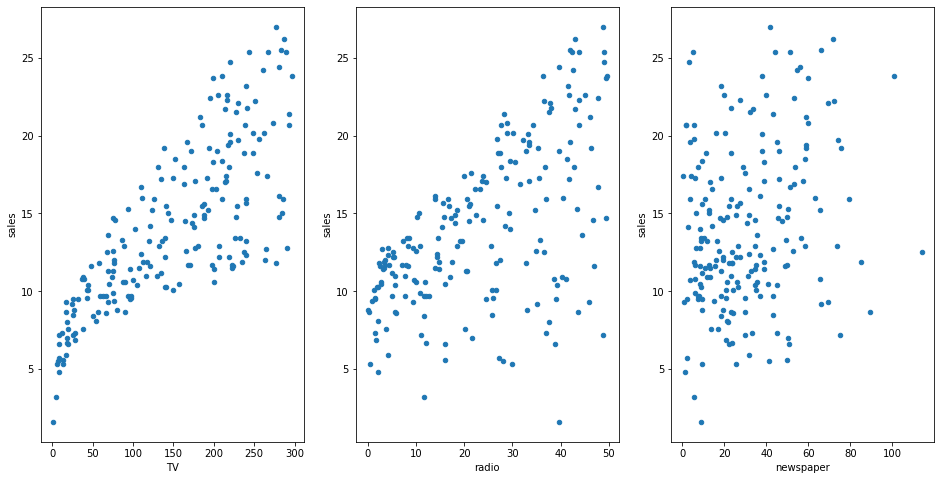

In [7]:
fig,axs = plt.subplots(1,3)

data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

simple linear regression

In [10]:
x = data[['TV']]
y = data.sales

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm =LinearRegression()
lm.fit(x,y)

LinearRegression()

In [13]:
#print intercept and coefficents
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [14]:
#calculate the prediction

In [15]:
7.032593549127693+0.04753664*50          #y=mx+c

9.409425549127693

In [16]:
#lets create a Data Frame sinks model expression
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

TV
0  50

In [17]:
#use model make prediction of new value

In [18]:
lm.predict(x_new)

array([9.40942557])

In [19]:
#PLOTTING THE LEAST SEQUENCE LINE (FOR UNDERSTANDING)

In [20]:
#CREATE DATAFRAME WITH MINIMUM AND MAXIMUM VALUE OF TV

In [21]:
x_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

In [22]:
x_new.head()

TV
0    0.7
1  296.4

In [23]:
#MAKE PREDICTION FOR THOSE X VALUES AND STORE THEM

In [24]:
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

In [25]:
#FIRST PLOT THE OBSEREVED DATA 


In [26]:
data.plot(kind='scatter',x='TV',y='sales')

<AxesSubplot:xlabel='TV', ylabel='sales'>

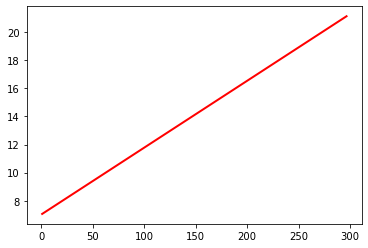

In [27]:
#THEN PLOT THE LEAST SEQUENCE LINE
plt.plot(x_new,preds,c='red',linewidth=2)

MODEL CONFIDENCE

In [28]:
import statsmodels.formula.api as smf


In [29]:
lm = smf.ols(formula='sales~TV',data=data).fit()      #(FOR UNDERSTANDING)

In [30]:
lm.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

HYPOTHESIS TESTING AND P VALUES

In [31]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [32]:
# R SQUARED VALUE OF MODEL  #MODEL EVALUATION INTERMS OF PERCENTAGE

In [33]:
lm.rsquared

0.611875050850071

MULTIPLE LINEAR REGRESSION

In [34]:
#create x and y
x = data[['TV','radio','newspaper']]
y = data.sales

In [35]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [36]:
#PRINT INTERCEPT AND COEFFICIENT          

In [38]:
print('Intercept:',lm.intercept_)
print('TV:',lm.coef_[0])
print('radio:',lm.coef_[1])
print('newspaper:',lm.coef_[2])

Intercept: 2.9388893694594067
TV: 0.04576464545539761
radio: 0.18853001691820462
newspaper: -0.0010374930424762972


NOTE:HERE U CXAN SEE NEWSPAPER IN -VE SO ITS NOT GIVING PROFIT

In [39]:
#one more time to get proof

In [40]:
lm = smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        19:31:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

note : here u can observe the alpha value to the p value

#IN ABOVE WE GET NEWSPAPER WAS WASTE DATA SO WE CALCULATE NEW MODEL EVALUATION OR % BY CONSIDERING TV AND RADIO

#ONLE INCLUDE TV RADIO IN THE MODEL

In [43]:
lm = smf.ols(formula='sales~TV+radio',data=data).fit()
lm.rsquared

0.8971942610828957

#ADD NEWSPAPER INTO THE MODEL (WHICH WE BELIEVE HAS NO ASSOCIATE WITH SALES)

In [44]:
lm = smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.rsquared

0.8972106381789522